In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import requests

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### EDA

In [2]:
gc_members = pd.read_csv('../Data Files/NSS_GreatCare_Members.csv')
admissions = pd.read_csv('../Data Files/NSS_Hospital_Inpatient_Admissions.csv')
pc_visits = pd.read_csv('../Data Files/NSS_PrimaryCare_Office_Visits.csv')

In [3]:
admissions = admissions.astype({'Attending Provider NPI':object, 
                                'Encounter Start Date':'datetime64[ns]',
                                'Encounter End Date':'datetime64[ns]',
                                'CMS Admit Type Code':object,
                                'CMS Patient Discharge Status Code':object,
                                'CMS Place of Service Code':object})
pc_visits = pc_visits.astype({'Attending Provider NPI':object, 
                              'Facility Provider NPI':object, 
                              'Service Provider NPI':object, 
                              'Provider Group NPI':object,
                              'Encounter Date':'datetime64[ns]'})
gc_members = gc_members.astype({'Patient Date of Birth':'datetime64[ns]',
                                'Patient ZIP Code 5-Digit':object,
                                'Administratively Assigned PCP Provider NPI':object,
                                'Empirically Attributed PCP Individual Provider NPI':object,
                                'Empirically Attributed PCP Group Provider NPI':object,
                                'Primary Payor Description':object,
                                'CMS Dual Status Code':object,
                                'Period Start Date':'datetime64[ns]',
                                'Period End Date':'datetime64[ns]'})

In [4]:
admissions.head()

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.41717e+09,1306890389,2013-01-12,2013-01-14,...,1,1,21,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.6696e+09,1902803315,2014-01-05,2014-01-12,...,1,1,21,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.40788e+09,1902803315,2012-06-13,2012-06-21,...,1,1,21,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.40701e+09,1427055839,2012-12-06,2012-12-09,...,1,1,21,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0
4,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,1.51805e+09,1992818256,2015-03-11,2015-03-14,...,2,1,NaN,NaN,NaN,F32.9,"Major depressive disorder, single episode, uns...",0,0.00,0.0


In [5]:
admissions.columns

Index(['Encounter ID', 'Patient ID', 'Encounter Primary Payor ID',
       'Encounter Primary Plan ID', 'Facility Provider ID',
       'Attending Provider ID', 'Attending Provider NPI',
       'Facility Provider NPI', 'Encounter Start Date', 'Encounter End Date',
       'Is Emergency Department Visit Parent Encounter',
       'Is Observation Stay Parent Encounter', 'CMS Admit Type Code',
       'CMS Admit Source Code', 'CMS Patient Discharge Status Code',
       'CMS Place of Service Code',
       'Principal Discharge Diagnosis ICD-9-CM Code',
       'Principal Discharge Diagnosis ICD-9-CM Description',
       'Principal Discharge Diagnosis ICD-10-CM Code',
       'Principal Discharge Diagnosis ICD-10-CM Description',
       'Primary Plan Allowed Amount', 'Primary Plan Paid Amount',
       'Patient Paid Amount'],
      dtype='object')

In [6]:
admissions.shape

(6213, 23)

In [7]:
pc_visits.head()

,Encounter ID,Patient ID,Service Provider ID,Attending Provider ID,Provider Group Provider ID,Facility Provider ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
0,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779,DS1|10076,DS1|NPI|1487856779,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.48786e+09,1.04343e+09,2011-02-18,0,1,0,0,NaN
1,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996,DS1|10088,DS1|NPI|1528030996,DS1|NPI|1528030996,DS1|NPI|1043427248,DS1|NPI|1902803315,DS1|1,DS1|5047W,1.52803e+09,1.9028e+09,1.52803e+09,1.04343e+09,2014-02-22,0,1,1,1,NaN
2,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365,DS1|10165,DS1|NPI|1477579365,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.47758e+09,1.04343e+09,2014-08-31,0,1,0,0,NaN
3,COV|EE|DS1|10240|20130624|DS1|NPI|1821178088,DS1|10240,DS1|NPI|1821178088,DS1|NPI|1821178088,DS1|NPI|1407058787,DS1|NPI|1104842020,DS1|1,DS1|5047W,1.82118e+09,1.10484e+09,1.82118e+09,1.40706e+09,2013-06-17,0,1,1,1,NaN
4,COV|EE|DS1|10293|20160904|DS1|NPI|1609004191,DS1|10293,DS1|NPI|1609004191,NaN,DS1|NPI|1184722779,NaN,DS1|1,DS1|5047X,NaN,NaN,1.609e+09,1.18472e+09,2016-09-04,0,1,0,0,NaN


In [8]:
gc_members.head()

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider in Last 36 Months,Count Visits with Attributee Primary Care Provider Group in Last 36 Months,...,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2013-01-01,2013-04-11
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024,6,1.0,5.0,...,0,0,0,0,1,0,0,0,2012-12-10,2013-01-01
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008,1,1.0,1.0,...,0,0,0,0,0,0,0,0,2015-04-18,2015-05-18
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2010-01-01,2010-04-09
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2012-08-01,2012-10-02


In [9]:
gc_members.columns

Index(['Patient ID', 'Primary Plan ID', 'Primary Payor ID', 'Is Patient Alive',
       'Patient Age Integer', 'Patient Date of Birth',
       'Patient ZIP Code 5-Digit',
       'Count Primary Care Visits in Last 36 Months',
       'Count Visits with Attributee Individual Primary Care Provider in Last 36 Months',
       'Count Visits with Attributee Primary Care Provider Group in Last 36 Months',
       'Administratively Assigned PCP Provider NPI',
       'Empirically Attributed PCP Individual Provider NPI',
       'Empirically Attributed PCP Individual Provider Description',
       'Empirically Attributed PCP Group Provider NPI',
       'Empirically Attributed PCP Group Provider Description',
       'Primary Plan Description', 'Primary Payor Description',
       'Primary Plan Financial Class Description',
       'Is Primary Plan Financial Class Commercial',
       'Is Primary Plan Financial Class Medicare FFS',
       'Is Primary Plan Financial Class Medicare Advantage',
       'Is Pri

### 1. What is our 30-day all cause readmission rate across hospitals our members are admitted to?

For each index event that each patient has, get only the **first** readmission within the 30 days following that index event.

In [10]:
admissions_dedup = admissions.sort_values(by=['Patient ID','Encounter Start Date', 'Encounter End Date']).drop_duplicates(subset=['Patient ID', 'Encounter Start Date'], keep = 'last')
admissions_dedup = admissions_dedup.sort_values(by=['Patient ID','Encounter End Date', 'Encounter Start Date']).drop_duplicates(subset=['Patient ID', 'Encounter End Date'], keep = 'first')
admissions.shape, admissions_dedup.shape

((6213, 23), (6149, 23))

In [11]:
def categorize_events(patient_admissions):
    patient_index_events = 0
    patient_readmission_events = 0
    last_index_event_discharge_date = None
    last_index_event_encounter_id = None
    readmission = False
    for ind, row in patient_admissions.iterrows():
        ##set first event as an intiial event or a non-qualifying readmission as initial event
        if patient_index_events == 0 or row['Encounter Start Date'] > last_index_event_discharge_date + dt.timedelta(days=30):
            patient_index_events += 1
            last_index_event_discharge_date = row['Encounter End Date']
            last_index_event_encounter_id = row['Encounter ID']
            readmission = False
            admissions.loc[admissions['Encounter ID'] == row['Encounter ID'], 'type'] = 'index without readmission'
        ##check if qualifying readmission and change readmit status of most recently added initial event to true
        elif readmission == False:
            patient_readmission_events += 1
            readmission = True
            admissions.loc[admissions['Encounter ID'] == last_index_event_encounter_id, 'type'] = 'index w readmission'
            admissions.loc[admissions['Encounter ID'] == row['Encounter ID'], 'type'] = 'initial readmission'
        ##check for duplicate readmission
        else:
            admissions.loc[admissions['Encounter ID'] == row['Encounter ID'], 'type'] = 'extra readmission'
            
    return patient_index_events, patient_readmission_events

In [12]:
total_index_events = 0
total_index_events_leading_to_readmission = 0

for patient in admissions_dedup['Patient ID'].unique():
    patient_admissions = admissions_dedup[admissions['Patient ID']==patient]
    times_admitted = patient_admissions.shape[0]
    if times_admitted > 1:
        patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
        ind, re = categorize_events(patient_admissions)
        total_index_events += ind
        total_index_events_leading_to_readmission += re
    else:
        encounter_id = patient_admissions['Encounter ID'].values[0]
        admissions.loc[admissions['Encounter ID'] == encounter_id, 'type'] = 'index without readmission'
        total_index_events += 1
print("Total Index Events:",total_index_events) 
print("Index Events Leading to Readmission:", total_index_events_leading_to_readmission)
print(str.format("Readmission Rate: {}%",round(total_index_events_leading_to_readmission/total_index_events*100,2)))

Total Index Events: 5536
Index Events Leading to Readmission: 527
Readmission Rate: 9.52%


In [13]:
admissions[['type']] = admissions[['type']].fillna(value='duplicate encounter')

### 2. What percent of patients have a PCP visit within a week of discharge?

In [14]:
pc_visits.head()

,Encounter ID,Patient ID,Service Provider ID,Attending Provider ID,Provider Group Provider ID,Facility Provider ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
0,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779,DS1|10076,DS1|NPI|1487856779,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.48786e+09,1.04343e+09,2011-02-18,0,1,0,0,NaN
1,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996,DS1|10088,DS1|NPI|1528030996,DS1|NPI|1528030996,DS1|NPI|1043427248,DS1|NPI|1902803315,DS1|1,DS1|5047W,1.52803e+09,1.9028e+09,1.52803e+09,1.04343e+09,2014-02-22,0,1,1,1,NaN
2,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365,DS1|10165,DS1|NPI|1477579365,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.47758e+09,1.04343e+09,2014-08-31,0,1,0,0,NaN
3,COV|EE|DS1|10240|20130624|DS1|NPI|1821178088,DS1|10240,DS1|NPI|1821178088,DS1|NPI|1821178088,DS1|NPI|1407058787,DS1|NPI|1104842020,DS1|1,DS1|5047W,1.82118e+09,1.10484e+09,1.82118e+09,1.40706e+09,2013-06-17,0,1,1,1,NaN
4,COV|EE|DS1|10293|20160904|DS1|NPI|1609004191,DS1|10293,DS1|NPI|1609004191,NaN,DS1|NPI|1184722779,NaN,DS1|1,DS1|5047X,NaN,NaN,1.609e+09,1.18472e+09,2016-09-04,0,1,0,0,NaN


In [15]:
admissions_dedup = admissions.sort_values(by=['Patient ID','Encounter Start Date', 'Encounter End Date']).drop_duplicates(subset=['Patient ID', 'Encounter Start Date'], keep = 'last')
admissions_dedup = admissions_dedup.sort_values(by=['Patient ID','Encounter End Date', 'Encounter Start Date']).drop_duplicates(subset=['Patient ID', 'Encounter End Date'], keep = 'first')
admissions.shape, admissions_dedup.shape

((6213, 24), (6149, 24))

In [16]:
total_hospital_visits = admissions_dedup.shape[0]
total_pcp_visits_in_7_days = 0

for ind, row in admissions_dedup.iterrows():
    patient = row['Patient ID']
    discharge_date = row['Encounter End Date']
    
    for i,r in pc_visits[pc_visits['Patient ID']==patient].iterrows():
        if r['Encounter Date'] <= discharge_date + dt.timedelta(days=7) and r['Encounter Date'] >= discharge_date:
            total_pcp_visits_in_7_days += 1
            admissions.loc[admissions['Encounter ID']==row['Encounter ID'], '7 day followup'] = True
            break
            
print('Total Hospital Visits: ', total_hospital_visits)
print('Total PCP Visits in 7 Days: ', total_pcp_visits_in_7_days)
print(str.format("PCP Visit Rate: {}%",round(total_pcp_visits_in_7_days/total_hospital_visits*100,2)))

Total Hospital Visits:  6149
Total PCP Visits in 7 Days:  1860
PCP Visit Rate: 30.25%


### 6. Are there certain patients we should focus on (e.g. frequent fliers)?

In [17]:
freq_fliers = admissions_dedup.loc[admissions.type == 'initial readmission']
freq_fliers = freq_fliers['Patient ID'].value_counts().reset_index()
freq_fliers.columns = ['patient_id','num_admissions']
freq_fliers = freq_fliers.head(10)
freq_fliers

,patient_id,num_admissions
0,DS1|3812,7
1,DS1|53241,5
2,DS1|37477,4
3,DS1|13593,4
4,DS1|10451,4
5,DS1|12422,4
6,DS1|21926,4
7,DS1|55609,4
8,DS1|36688,3
9,DS1|48347,3


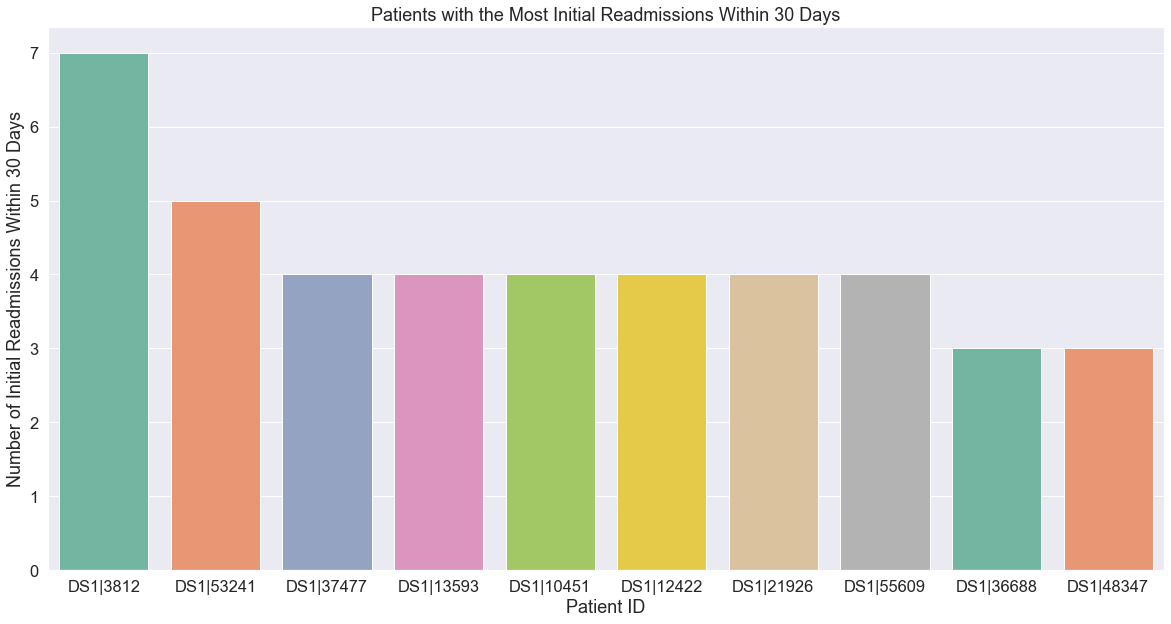

In [18]:
plt.figure(figsize = (20,10))
sns.set(style="darkgrid", font_scale=1.5)
sns.barplot(x = 'patient_id', y = 'num_admissions', data = freq_fliers, palette='Set2')
plt.xlabel('Patient ID')
plt.ylabel('Number of Initial Readmissions Within 30 Days')
plt.title('Patients with the Most Initial Readmissions Within 30 Days');

### Bonus: How does the readmission rate or rate of pc visits within 7 days differ among patients with different CCW conditions?

#### Merging and renaming

In [19]:
admissions_dedup.shape

(6149, 24)

In [20]:
ccw_admissions = pd.merge(admissions_dedup, gc_members, on='Patient ID', how='inner')

In [21]:
ccw_admissions.shape

(6149, 86)

In [22]:
ccw_admissions = ccw_admissions[['Patient ID', 'Encounter ID', 'Encounter Start Date', 
        'Encounter End Date', 'Count CCW Conditions', 
        'Is CCW Acquired Hypothyroidism', 'Is CCW Acute Myocardial Infarction', 
        'Is CCW Alzheimers Disease', 'Is CCW Alzheimers Disease and  Related Disorders or Senile Deme',
        'Is CCW Anemia', 'Is CCW Asthma', 'Is CCW Atrial Fibrillation',
        'Is CCW Benign Prostatic  Hyperplasia', 'Is CCW Breast Cancer',
        'Is CCW Cataract', 'Is CCW CKD', 'Is CCW COPD and Bronchiectasis',
        'Is CCW Colorectal Cancer', 'Is CCW Depression', 'Is CCW Diabetes',
        'Is CCW Endometrial Cancer', 'Is CCW Glaucoma', 'Is CCW Heart Failure',
        'Is CCW Hip or Pelvic Fracture', 'Is CCW Hyperlipidemia',
        'Is CCW Hypertension', 'Is CCW Ischemic Heart Disease',
        'Is CCW Lung Cancer', 'Is CCW Osteoporosis', 'Is CCW Prostate Cancer',
        'Is CCW Rheumatoid Arthritis or Osteoarthritis',
        'Is CCW Stroke or Transient Ischemic Attack', 'Is CCW ASCVD',
        'Is CCW Anxiety Disorders', 'Is CCW Depressive Disorders',
        'Is CCW Schizophrenia or Other Psychotic Disorders',
        'Is CCW Bipolar Disorder']]

In [23]:
ccw_admissions = ccw_admissions.rename(columns={'Patient ID':'Patient ID', 'Encounter ID':'Encounter ID', 'Encounter Start Date':'Encounter Start Date', 
        'Encounter End Date':'Encounter End Date', 'Count CCW Conditions':'count_conditions', 
        'Is CCW Acquired Hypothyroidism':'hypothyroidism', 'Is CCW Acute Myocardial Infarction':'acute_myocardial_infarction', 
        'Is CCW Alzheimers Disease':'alzheimers', 'Is CCW Alzheimers Disease and  Related Disorders or Senile Deme':'alzheimers_related',
        'Is CCW Anemia':'anemia', 'Is CCW Asthma':'asthma', 'Is CCW Atrial Fibrillation':'atrial_fibrillation',
        'Is CCW Benign Prostatic  Hyperplasia':'benign_prostatic_hyperplasia', 'Is CCW Breast Cancer':'breast_cancer',
        'Is CCW Cataract':'cataract', 'Is CCW CKD':'ckd', 'Is CCW COPD and Bronchiectasis':'copd_bronchiectasis',
        'Is CCW Colorectal Cancer':'colorectal_cancer', 'Is CCW Depression':'depression', 'Is CCW Diabetes':'diabetes',
        'Is CCW Endometrial Cancer':'endometrial_cancer', 'Is CCW Glaucoma':'glaucoma', 'Is CCW Heart Failure':'heart_failure',
        'Is CCW Hip or Pelvic Fracture':'hip_pelvic_fracture', 'Is CCW Hyperlipidemia':'hyperlipidemia',
        'Is CCW Hypertension':'hypertension', 'Is CCW Ischemic Heart Disease':'ischemic_heart_disease',
        'Is CCW Lung Cancer':'lung_cancer', 'Is CCW Osteoporosis':'osteoporosis', 'Is CCW Prostate Cancer':'prostate_cancer',
        'Is CCW Rheumatoid Arthritis or Osteoarthritis':'rheumatoid_osteoarthritis',
        'Is CCW Stroke or Transient Ischemic Attack':'transient_ischemic_attack', 'Is CCW ASCVD':'ascvd',
        'Is CCW Anxiety Disorders':'anxiety_disorders', 'Is CCW Depressive Disorders':'depressive_disorders',
        'Is CCW Schizophrenia or Other Psychotic Disorders':'schizophrenia_psychotic',
        'Is CCW Bipolar Disorder':'bipolar'})

In [24]:
ccw_admissions.head()

,Patient ID,Encounter ID,Encounter Start Date,Encounter End Date,count_conditions,hypothyroidism,acute_myocardial_infarction,alzheimers,alzheimers_related,anemia,...,lung_cancer,osteoporosis,prostate_cancer,rheumatoid_osteoarthritis,transient_ischemic_attack,ascvd,anxiety_disorders,depressive_disorders,schizophrenia_psychotic,bipolar
0,DS1|10,HIA|DS1|10|DS1|NPI|1710918545|1,2013-06-13,2013-06-16,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,DS1|10033,HIA|DS1|10033|DS1|NPI|1306890389|1,2013-01-12,2013-01-14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DS1|10043,HIA|DS1|10043|DS1|NPI|1902803315|1,2014-01-05,2014-01-12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DS1|10073,HIA|DS1|10073|DS1|NPI|1902803315|1,2012-06-13,2012-06-21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DS1|10101,HIA|DS1|10101|DS1|NPI|1427055839|1,2012-12-06,2012-12-09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Readmission Rate

In [25]:
def categorize_events(patient_admissions):
    patient_index_events = 0
    patient_readmission_events = 0
    last_index_event_discharge_date = None
    last_index_event_encounter_id = None
    readmission = False
    for ind, row in patient_admissions.iterrows():
        if patient_index_events == 0 or row['Encounter Start Date'] > last_index_event_discharge_date + dt.timedelta(days=30):
            patient_index_events += 1
            last_index_event_discharge_date = row['Encounter End Date']
            last_index_event_encounter_id = row['Encounter ID']
            readmission = False
        elif readmission == False:
            patient_readmission_events += 1
            readmission = True
    return patient_index_events, patient_readmission_events

In [26]:
ccw_admissions.columns[5:]

Index(['hypothyroidism', 'acute_myocardial_infarction', 'alzheimers',
       'alzheimers_related', 'anemia', 'asthma', 'atrial_fibrillation',
       'benign_prostatic_hyperplasia', 'breast_cancer', 'cataract', 'ckd',
       'copd_bronchiectasis', 'colorectal_cancer', 'depression', 'diabetes',
       'endometrial_cancer', 'glaucoma', 'heart_failure',
       'hip_pelvic_fracture', 'hyperlipidemia', 'hypertension',
       'ischemic_heart_disease', 'lung_cancer', 'osteoporosis',
       'prostate_cancer', 'rheumatoid_osteoarthritis',
       'transient_ischemic_attack', 'ascvd', 'anxiety_disorders',
       'depressive_disorders', 'schizophrenia_psychotic', 'bipolar'],
      dtype='object')

In [27]:
readmission_rate = []
for column in ccw_admissions.columns[5:]:
    total_index_events = 0
    total_index_events_leading_to_readmission = 0
    ccw = ccw_admissions.loc[ccw_admissions[column] == 1]
    for patient in ccw['Patient ID'].unique():
        patient_admissions = ccw[ccw['Patient ID']==patient]
        times_admitted = patient_admissions.shape[0]
        if times_admitted > 1:
            patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
            ind, re = categorize_events(patient_admissions)
            total_index_events += ind
            total_index_events_leading_to_readmission += re
        else:
            encounter_id = patient_admissions['Encounter ID'].values[0]
            total_index_events += 1
    readmission_rate.append(round(total_index_events_leading_to_readmission/total_index_events*100,2)) #added

In [28]:
ccw.shape

(36, 37)

In [29]:
ccw_measures = pd.DataFrame({'ccw_condition':['Hypothyroidism','Acute Myocardial Infarction', 
                                                        'Alzheimers Disease','Alzheimers Disease and Related Disorders',
                                                        'Anemia', 'Asthma', 'Atrial Fibrillation',
                                                        'Benign Prostatic Hyperplasia', 'Breast Cancer',
                                                        'Cataract', 'CKD', 'COPD and Bronchiectasis',
                                                        'Colorectal Cancer', 'Depression', 'Diabetes',
                                                        'Endometrial Cancer', 'Glaucoma', 'Heart Failure',
                                                        'Hip or Pelvic Fracture', 'Hyperlipidemia',
                                                        'Hypertension', 'Ischemic Heart Disease',
                                                        'Lung Cancer', 'Osteoporosis', 'Prostate Cancer',
                                                        'Rheumatoid Arthritis',
                                                        'Stroke or Transient Ischemic Attack', 'ASCVD',
                                                        'Anxiety Disorders', 'Depressive Disorders',
                                                        'Schizophrenia or Other Psychotic Disorders',
                                                        'Bipolar Disorder'],
                                        'readmission_rate':readmission_rate})

In [30]:
ccw = ccw_admissions.loc[ccw_admissions.count_conditions == 0]
total_index_events = 0
total_index_events_leading_to_readmission = 0

for patient in ccw['Patient ID'].unique():
    patient_admissions = ccw[ccw['Patient ID']==patient]
    times_admitted = patient_admissions.shape[0]
    if times_admitted > 1:
        patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
        ind, re = categorize_events(patient_admissions)
        total_index_events += ind
        total_index_events_leading_to_readmission += re
    else:
        encounter_id = patient_admissions['Encounter ID'].values[0]
        total_index_events += 1
print(str.format("Readmission Rate for Patients with No CCW Conditions: {}%",round(total_index_events_leading_to_readmission/total_index_events*100,2)))

ccw = ccw_admissions.loc[ccw_admissions.count_conditions > 0]
total_index_events = 0
total_index_events_leading_to_readmission = 0

for patient in ccw['Patient ID'].unique():
    patient_admissions = ccw[ccw['Patient ID']==patient]
    times_admitted = patient_admissions.shape[0]
    if times_admitted > 1:
        patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
        ind, re = categorize_events(patient_admissions)
        total_index_events += ind
        total_index_events_leading_to_readmission += re
    else:
        encounter_id = patient_admissions['Encounter ID'].values[0]
        total_index_events += 1
print(str.format("Readmission Rate for Patients with 1+ CCW Conditions: {}%",round(total_index_events_leading_to_readmission/total_index_events*100,2)))

Readmission Rate for Patients with No CCW Conditions: 6.59%
Readmission Rate for Patients with 1+ CCW Conditions: 14.65%


#### PCP Visit Rate

In [31]:
ccw_admissions.columns

Index(['Patient ID', 'Encounter ID', 'Encounter Start Date',
       'Encounter End Date', 'count_conditions', 'hypothyroidism',
       'acute_myocardial_infarction', 'alzheimers', 'alzheimers_related',
       'anemia', 'asthma', 'atrial_fibrillation',
       'benign_prostatic_hyperplasia', 'breast_cancer', 'cataract', 'ckd',
       'copd_bronchiectasis', 'colorectal_cancer', 'depression', 'diabetes',
       'endometrial_cancer', 'glaucoma', 'heart_failure',
       'hip_pelvic_fracture', 'hyperlipidemia', 'hypertension',
       'ischemic_heart_disease', 'lung_cancer', 'osteoporosis',
       'prostate_cancer', 'rheumatoid_osteoarthritis',
       'transient_ischemic_attack', 'ascvd', 'anxiety_disorders',
       'depressive_disorders', 'schizophrenia_psychotic', 'bipolar'],
      dtype='object')

In [32]:
pc_visit_rate = []
for column in ccw_admissions.columns[5:]:
    ccw_pc = ccw_admissions.loc[ccw_admissions[column] == 1]
    total_hospital_visits = ccw_pc.shape[0]
    total_pcp_visits_in_7_days = 0

    for ind, row in ccw_pc.iterrows():
        patient = row['Patient ID']
        discharge_date = row['Encounter End Date']

        for i,r in pc_visits[pc_visits['Patient ID']==patient].iterrows():
            if r['Encounter Date'] <= discharge_date + dt.timedelta(days=7) and r['Encounter Date'] >= discharge_date:
                total_pcp_visits_in_7_days += 1
                break
    pc_visit_rate.append(round(total_pcp_visits_in_7_days/total_hospital_visits*100,2))

In [33]:
ccw_measures['pc_visit_rate'] = pc_visit_rate

In [38]:
ccw_pc = ccw_admissions.loc[ccw_admissions.count_conditions == 0] 
total_hospital_visits = ccw_pc.shape[0]
total_pcp_visits_in_7_days = 0

for ind, row in ccw_pc.iterrows():
    patient = row['Patient ID']
    discharge_date = row['Encounter End Date']
    
    for i,r in pc_visits[pc_visits['Patient ID']==patient].iterrows():
        if r['Encounter Date'] <= discharge_date + dt.timedelta(days=7) and r['Encounter Date'] >= discharge_date:
            total_pcp_visits_in_7_days += 1
            break
print(str.format("PCP Visit Rate for Patients with No CCW Conditions: {}%",round(total_pcp_visits_in_7_days/total_hospital_visits*100,2)))

ccw_pc = ccw_admissions.loc[ccw_admissions.count_conditions > 0] 
total_hospital_visits = ccw_pc.shape[0]
total_pcp_visits_in_7_days = 0

for ind, row in ccw_pc.iterrows():
    patient = row['Patient ID']
    discharge_date = row['Encounter End Date']
    
    for i,r in pc_visits[pc_visits['Patient ID']==patient].iterrows():
        if r['Encounter Date'] <= discharge_date + dt.timedelta(days=7) and r['Encounter Date'] >= discharge_date:
            total_pcp_visits_in_7_days += 1
            break
print(str.format("PCP Visit Rate for Patients with 1+ CCW Conditions: {}%",round(total_pcp_visits_in_7_days/total_hospital_visits*100,2)))

PCP Visit Rate for Patients with No CCW Conditions: 32.06%
PCP Visit Rate for Patients with 1+ CCW Conditions: 27.35%


#### Visualizations

In [34]:
ccw_measures_read = ccw_measures.sort_values('readmission_rate', ascending=False)
ccw_measures_read

,ccw_condition,readmission_rate,pc_visit_rate
22,Lung Cancer,31.03,9.76
12,Colorectal Cancer,30.56,4.17
6,Atrial Fibrillation,29.03,32.18
26,Stroke or Transient Ischemic Attack,27.87,30.12
10,CKD,26.86,28.03
17,Heart Failure,25.27,24.89
2,Alzheimers Disease,25.00,50.00
4,Anemia,23.31,25.91
15,Endometrial Cancer,23.08,12.12
9,Cataract,21.62,24.73


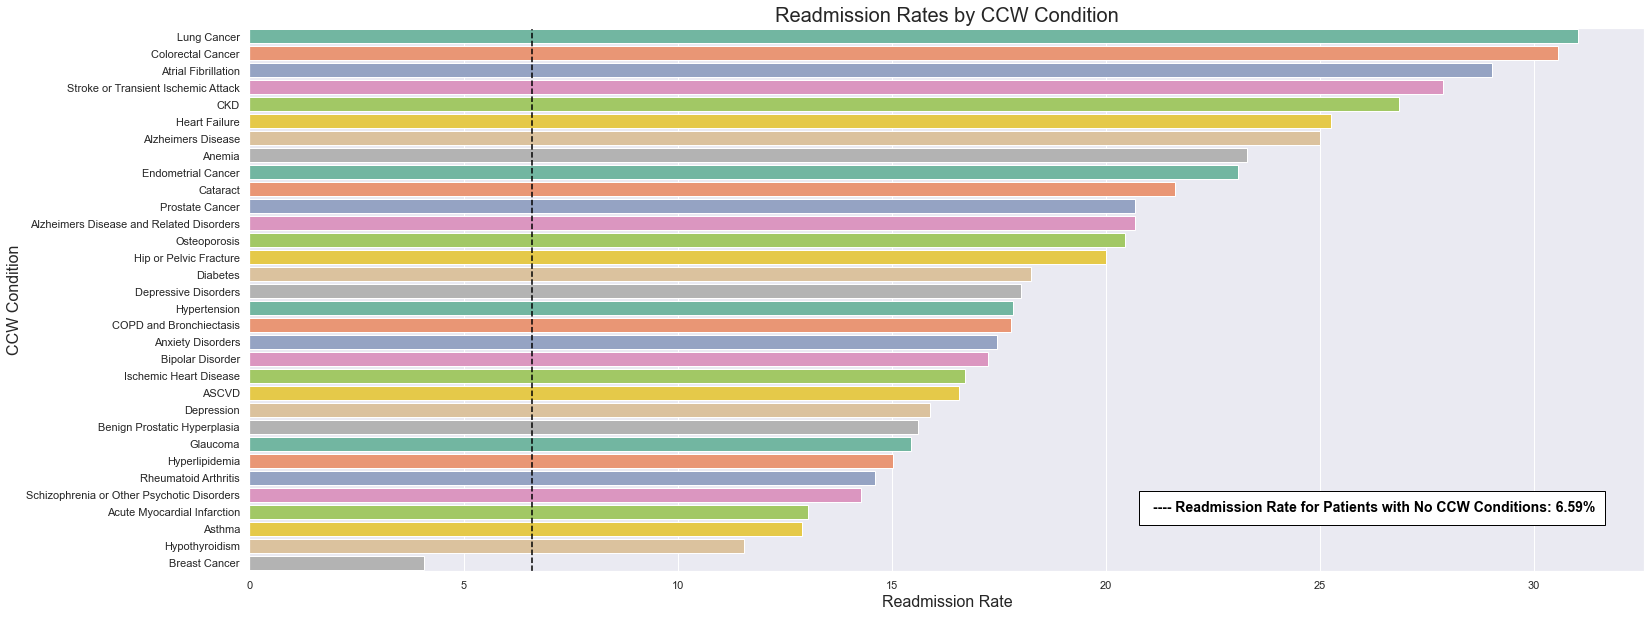

In [35]:
plt.figure(figsize = (25,10))
sns.set(style="darkgrid")
graph = sns.barplot(x = 'readmission_rate', y = 'ccw_condition', data = ccw_measures_read, palette='Set2')
graph.axvline(6.59, linestyle='--',color='black')
t = graph.text(21,28, ' ---- Readmission Rate for Patients with No CCW Conditions: 6.59%', size=14, color = 'black', weight='bold')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black', pad=10))
#plt.xticks(rotation=45)
plt.ylabel('CCW Condition',fontsize=16)
plt.xlabel('Readmission Rate', fontsize=16)
plt.title('Readmission Rates by CCW Condition', fontsize=20);

In [36]:
ccw_measures_pc = ccw_measures.sort_values('pc_visit_rate', ascending=True)
ccw_measures_pc

,ccw_condition,readmission_rate,pc_visit_rate
12,Colorectal Cancer,30.56,4.17
22,Lung Cancer,31.03,9.76
15,Endometrial Cancer,23.08,12.12
7,Benign Prostatic Hyperplasia,15.62,15.79
30,Schizophrenia or Other Psychotic Disorders,14.29,16.00
8,Breast Cancer,4.08,17.65
25,Rheumatoid Arthritis,14.62,21.34
3,Alzheimers Disease and Related Disorders,20.69,21.62
11,COPD and Bronchiectasis,17.78,22.94
1,Acute Myocardial Infarction,13.04,23.08


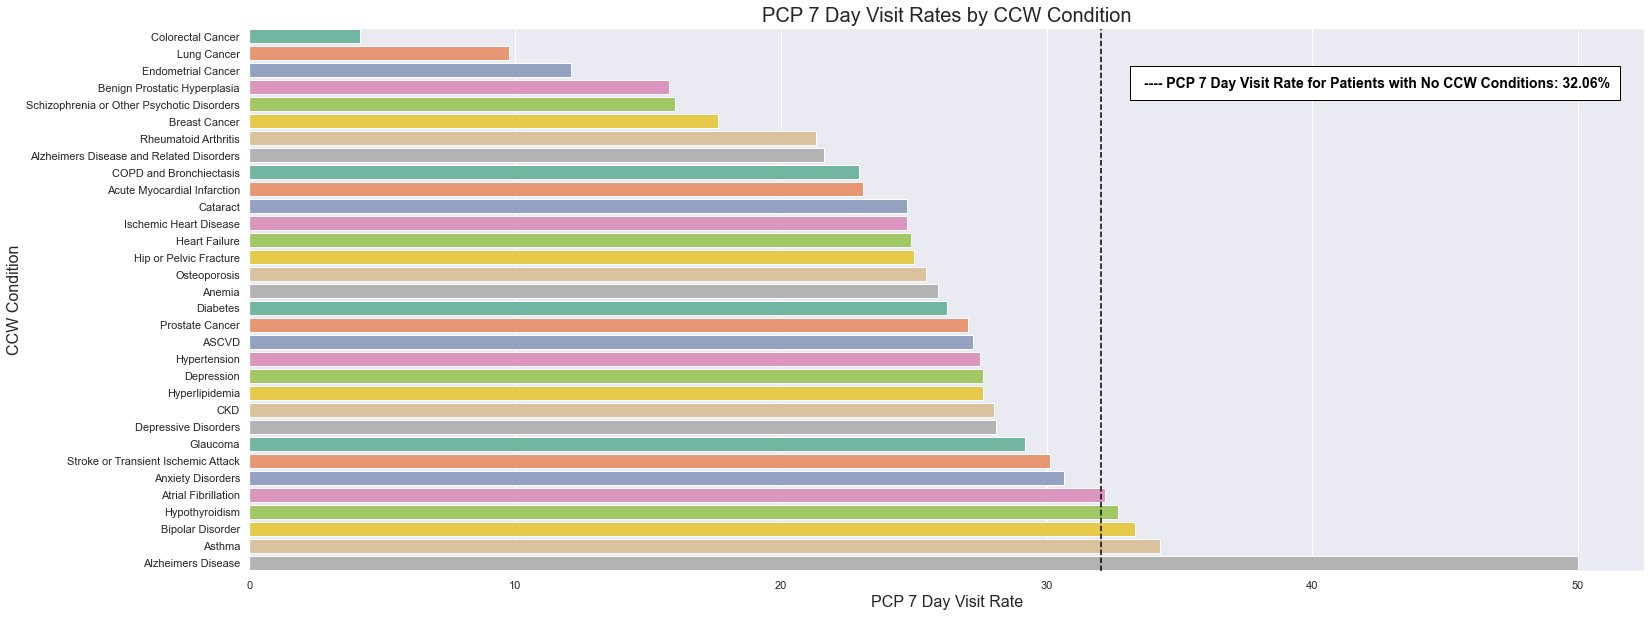

In [48]:
plt.figure(figsize = (25,10))
sns.set(style="darkgrid")
graph = sns.barplot(x = 'pc_visit_rate', y = 'ccw_condition', data = ccw_measures_pc, palette='Set2')
graph.axvline(32.06, linestyle='--',color='black')
t = graph.text(33.5,3, ' ---- PCP 7 Day Visit Rate for Patients with No CCW Conditions: 32.06%', size=14, color = 'black', weight='bold')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black', pad=10))
#plt.xticks(rotation=45)
plt.ylabel('CCW Condition',fontsize=16)
plt.xlabel('PCP 7 Day Visit Rate', fontsize=16)
plt.title('PCP 7 Day Visit Rates by CCW Condition', fontsize=20);